# Portfolio variance

[*********************100%%**********************]  12 of 12 completed


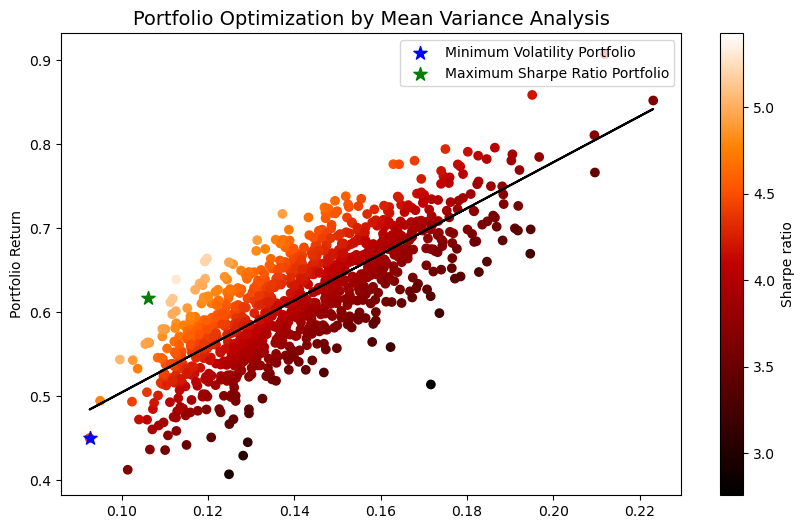


Optimal Weights (Max Sharpe Ratio):
CSCO: 6.08%
JPM: 12.25%
NFLX: 3.25%
SW: 10.14%
WMT: 11.22%
HCA: 1.09%
CTAS: 7.09%
WELL: 2.83%
WMB: 1.34%
VST: 20.86%
LIN: 6.79%
IEF: 17.06%

Linear Regression Equation: Return = 2.7405 * Volatility + 0.2308
Root Mean Squared Error (RMSE): 0.0421
Maximum Sharpe Ratio: 5.4280
Calculated R-squared (R²): 0.6320


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
import pandas as pd
import yfinance as yf

'''
Assets which optimally make a high Sharpe ratio with good data concentration
'CSCO', 'JPM', 'NFLX', 'SW', 'WMT', 'HCA', 'CTAS', 'WELL', 'WMB', 'VST', 'LIN', 'IEF'
IEF is iShares 7-10 year treasury bond ETF
'''

'''
'CSCO', 'MSI', 'HPE', 'ZBRA', 'JNPR',
          'ADBE', 'MSFT', 'ORCL', 'PLTR', 'PANW', 'SNPS', 'CRWD', 'FTNT', 'GPN', 'CPAY', 'GDDY', 'GEN', 'VRSN', 'FFIV', 'AKAM',
          'ACN', 'IBM', 'FI', 'FIS', 'IT', 'CTSH', 'LDOS', 'BR', 'CDW', 'EPAM', 'JKHY',

          'JPM', 'BAC', 'WFC', 'C', 'BK',
          'BX', 'BLK', 'KKR', 'AMP', 'RJF', 'STT', 'TROW', 'NTRS', 'PFG', 'BEN', 'IVZ',
          'SPGI', 'ICE', 'MCO', 'CME', 'MSCI', 'NDAQ', 'CBOE', 'FDS',
          
          'NFLX', 'DIS', 'LYV', 'WBD', 'FOX', 'NWS', 'PARA',
          'TMUS', 'CMCSA', 'T', 'VZ', 'CHTR',
          'EA', 'TTWO',
          
          'SW', 'PKG', 'BALL', 'IP', 'AMCR', 'AVY',
          'BKNG', 'ABNB', 'RCL', 'CCL', 'EXPE', 'NCLH',
          'MAR', 'HLT',
          
          'WMT', 'COST', 'TGT', 'DG', 'DLTR',
          'PM', 'MO',
          'PG', 'CL', 'KVUE', 'KMB', 'CHD', 'EL', 'CLX',
          
          'HCA', 'DVA', 'UHS',
          'ZTS', 'VTRS', 'CTLT',
          'ABT', 'SYK', 'BSX', 'MDT', 'EW', 'GEHC', 'DXCM', 'ZBH', 'STE', 'PODD',
          
          'WELL', 'VTR', 'DOC',
          'CBRE', 'CSGP',
          'AMT', 'EQIX', 'DLR', 'CCI', 'IRM', 'SBAC', 'WY',
          
          'WMB', 'OKE', 'KMI', 'TRGP',
          'SLB', 'BKR', 'HAL',
          'XOM', 'CVX',
          
          'VST', 'NRG', 
          'GEV', 'CEG',
          'ATO', 'NI',
          
          'LIN', 'SHW', 'ECL', 'APD', 'DD', 'LYB', 'PPG', 'IFF', 'ALB', 'EMN',
          'MLM', 'VMC',
          'CTVA', 'CF', 'MOS', 'FMC',
          
          'CTAS', 'CPRT', 'AMTM',
          'GE', 'RTX', 'LMT', 'BA', 'GD', 'NOC', 'TDG', 'LHX', 'AXON', 'HWM', 'TXT', 'HII',
          'UNP', 'CSX', 'NSC', 'WAB', 'IEF'
'''

assets = ['CSCO', 'JPM', 'NFLX', 'SW', 'WMT', 'HCA', 'CTAS', 'WELL', 'WMB', 'VST', 'LIN', 'IEF']

# datetime.today().strftime('%Y-%m-%d')
start_date = '2023-11-01'
end_date = '2024-11-27'
stock_prices = yf.download(assets, start=start_date, end=end_date)['Adj Close']

'''
# Step 1 - calculate daily returns, mean returns, and covariance
Covariance = 1 / (T - 1) * (R - R_mean)^T * (R - R_mean). Where T is number of time periods
'''
returns = stock_prices.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Step 2 - number of portfolio simulations and weight adjustment
number_of_portfolios = 1000
results = np.zeros((3, number_of_portfolios)) # 3 by 1000 matrix
weight_records = []

np.random.seed(42) # Fixes the sequence of portfolio weights i.e no different values for running the code
for portfolio in range(number_of_portfolios):
    weights = np.random.random(len(assets))
    weights = weights / np.sum(weights)

    '''
    assets = ['NVDA', 'ARM', 'SPY]
    weights = [0.3097, 0.29, 0.8714]. Here, asset weights do not add up to 1. Hence, an adjustment has to be made

    weights = weights / sum of weights
    for example, 0.3097 / (0.3097 + 0.29 + 0.8714) = 0.21056. Same with other asset weights
    '''
    weight_records.append(weights)

    # Portfolio return = weight of asset_i * mean return on that asset. Adjusted with number of trading days in a year
    portfolio_return = np.dot(weights, mean_returns) * 252

    # Portfolio volatility: sigma = square root of [(w transpose) * covariance * w-vector]
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

    # Max Sharpe ratio 
    sharpe_ratio = (portfolio_return - 0.0411) / portfolio_volatility

    # Store in results matrix
    results[0, portfolio] = portfolio_return
    results[1, portfolio] = portfolio_volatility
    results[2, portfolio] = sharpe_ratio

# the indices at which min_volatility and max_sharpe ratio are present
min_volatility = np.argmin(results[1])
min_volatility_portfolio = results[:, min_volatility]
max_sharpe_ratio = np.argmax(results[2])
max_sharpe_ratio_portfolio = results[:, max_sharpe_ratio]

# Least squares regression (Linear Algebra way) β = (X^T * X)^(-1) * X^T * y
x = results[1].reshape(-1, 1) # column of volatilities
y = results[0].reshape(-1, 1) # column of returns
x_matrix = np.c_[np.ones(x.shape[0]), x]
x_transpose = x_matrix.T # X^T
x_transpose_x = x_transpose @ x_matrix # X^T * X
x_transpose_y = x_transpose @ y # X^T * y

# β = (X^T * X)^(-1) * X^T * y
beta = np.linalg.inv(x_transpose_x) @ x_transpose_y # beta is a 2 by 1 matrix where first row is slope and second row is intercept
predicted_y = beta[0] + beta[1] * x

plt.figure(figsize = (10, 6))
plt.scatter(results[1], results[0], c = results[2, :], cmap = 'gist_heat', marker = 'o')
plt.colorbar(label = 'Sharpe ratio')
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], marker = '*', color = 'blue', s = 100, label = 'Minimum Volatility Portfolio')
plt.scatter(max_sharpe_ratio_portfolio[1], max_sharpe_ratio_portfolio[0], marker = '*', s = 100, color = 'green', label = 'Maximum Sharpe Ratio Portfolio')
plt.title('Portfolio Optimization by Mean Variance Analysis', size = 14)
plt.ylabel('Portfolio Return')
plt.plot(x, predicted_y, color = 'black')
plt.legend(loc = 'upper right')
plt.show()

# Output the maximum Sharpe Ratio portfolio weights
best_weights = weight_records[max_sharpe_ratio]

print("\nOptimal Weights (Max Sharpe Ratio):")
for ticker, weight in zip(assets, best_weights):
    print(f"{ticker}: {weight * 100:.2f}%")

# Output the linear regression equation
print(f"\nLinear Regression Equation: Return = {beta[1][0]:.4f} * Volatility + {beta[0][0]:.4f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y, predicted_y))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Output the maximum Sharpe Ratio
print(f"Maximum Sharpe Ratio: {max_sharpe_ratio_portfolio[2]:.4f}")

# Calculate R-squared
predicted_returns_y = predicted_y
mean_y = np.mean(y)
ss_res = np.sum((y - predicted_returns_y) ** 2)
ss_tot = np.sum((y - mean_y) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Calculated R-squared (R²): {r_squared:.4f}")

In [26]:
# Sample mean (average return)
sample_mean = returns.mean().mean()  # Mean of all stock returns

# Sample standard deviation (volatility)
sample_std = returns.std().mean()  # Standard deviation of returns

# Sample size (number of data points)
n = len(returns)  # Number of observations

# Population mean (from H0)
mu_0 = 0.1026

# Calculate the t-statistic
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculate the p-value for a two-tailed test
from scipy import stats
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

# Output t-statistic and p-value
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Decision based on p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value = {p_value:.4f})")
else:
    print(f"Fail to reject the null hypothesis (p-value = {p_value:.4f})")

print('Sample mean: ' + str(sample_mean))
print('Sample standard deviation: ' + str(sample_std))
print('Sample size: ' + str(n))

t-statistic: -61.1157
p-value: 0.0000
Reject the null hypothesis (p-value = 0.0000)
Sample mean: 0.002452843977050694
Sample standard deviation: 0.016386487645534756
Sample size: 100
